In [21]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import matplotlib as plt
import json
from fredapi import Fred

In [2]:
load_dotenv()
fred_api_key = os.getenv("FRED_API_KEY")
fred = Fred(api_key=fred_api_key)

In [31]:
df_unemp = fred.search('unemployment rate state', filter=('frequency','Monthly'))
df_unemp = df_unemp.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
# filter for only unemployment rate in title
df_unemp = df_unemp.loc[df_unemp['title'].str.contains('Unemployment Rate')]

In [36]:
df_unemp

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-01-25,2024-01-25,Unemployment Rate,1948-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 10:28:02-06:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-01-25,2024-01-25,Unemployment Rate - Black or African American,1972-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 10:28:18-06:00,68,The series comes from the 'Current Population ...
CAUR,CAUR,2024-01-25,2024-01-25,Unemployment Rate in California,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:42:01-06:00,63,None
LNS14000024,LNS14000024,2024-01-25,2024-01-25,Unemployment Rate - 20 Yrs. & over,1948-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-05 07:45:32-06:00,55,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-01-25,2024-01-25,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000089,LNS14000089,2024-01-25,2024-01-25,Unemployment Rate - 25-34 Yrs.,1948-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-05 07:46:26-06:00,4,The series comes from the 'Current Population ...
LNS14000026,LNS14000026,2024-01-25,2024-01-25,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-05 07:46:29-06:00,6,To obtain estimates of women worker employment...
CNERUR,CNERUR,2024-01-25,2024-01-25,Unemployment Rate in Northeast Census Region,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:41:11-06:00,3,None


In [62]:
# drop rows in 'series id' column that do not end with UR
unemp_result = df_unemp[df_unemp['id'].str.endswith('UR')]

In [63]:
unemp_result.shape

(57, 15)

In [64]:
unemp_result.id.unique()

array(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'MIUR', 'PAUR', 'NCUR',
       'ILUR', 'ALUR', 'NJUR', 'MAUR', 'WIUR', 'COUR', 'GAUR', 'VAUR',
       'SCUR', 'AZUR', 'IAUR', 'ORUR', 'KYUR', 'INUR', 'MDUR', 'TNUR',
       'ARUR', 'NVUR', 'MNUR', 'NMUR', 'MOUR', 'LAUR', 'PRUR', 'WVUR',
       'UTUR', 'CTUR', 'WAUR', 'MSUR', 'NDUR', 'OKUR', 'DEUR', 'NEUR',
       'HIUR', 'KSUR', 'AKUR', 'NHUR', 'WYUR', 'MTUR', 'IDUR', 'DCUR',
       'SDUR', 'MEUR', 'RIUR', 'VTUR', 'CMWRUR', 'CNEWUR', 'CSOUUR',
       'CNERUR', 'CWSTUR'], dtype=object)

In [68]:
# remove rows with id = CMWRU, CNEWUR, CSOUUR, CNERUR, CWSTUR
unemp_result = unemp_result[~unemp_result['id'] \
    .isin(['CMWRUR', 'CNEWUR', 'CSOUUR', 'CNERUR', 'CWSTUR'])]

In [69]:
unemp_result.shape

(52, 15)

In [70]:
unemp_result.index

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'MIUR', 'PAUR', 'NCUR', 'ILUR',
       'ALUR', 'NJUR', 'MAUR', 'WIUR', 'COUR', 'GAUR', 'VAUR', 'SCUR', 'AZUR',
       'IAUR', 'ORUR', 'KYUR', 'INUR', 'MDUR', 'TNUR', 'ARUR', 'NVUR', 'MNUR',
       'NMUR', 'MOUR', 'LAUR', 'PRUR', 'WVUR', 'UTUR', 'CTUR', 'WAUR', 'MSUR',
       'NDUR', 'OKUR', 'DEUR', 'NEUR', 'HIUR', 'KSUR', 'AKUR', 'NHUR', 'WYUR',
       'MTUR', 'IDUR', 'DCUR', 'SDUR', 'MEUR', 'RIUR', 'VTUR'],
      dtype='object', name='series id')

In [71]:
all_result =[]

for id in unemp_result.index:
    result = fred.get_series(id)
    result = result.to_frame(name = id)
    all_result.append(result)

In [83]:
all_result[1]

,TXUR
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2023-08-01,4.1
2023-09-01,4.1
2023-10-01,4.1
2023-11-01,4.1


In [79]:
print("".join([str(x) for x in all_result]))

            CAUR
1976-01-01   9.2
1976-02-01   9.2
1976-03-01   9.1
1976-04-01   9.1
1976-05-01   9.0
...          ...
2023-08-01   4.6
2023-09-01   4.7
2023-10-01   4.8
2023-11-01   4.9
2023-12-01   5.1

[576 rows x 1 columns]            TXUR
1976-01-01   5.8
1976-02-01   5.8
1976-03-01   5.9
1976-04-01   5.9
1976-05-01   5.9
...          ...
2023-08-01   4.1
2023-09-01   4.1
2023-10-01   4.1
2023-11-01   4.1
2023-12-01   4.0

[576 rows x 1 columns]            FLUR
1976-01-01   9.7
1976-02-01   9.7
1976-03-01   9.6
1976-04-01   9.5
1976-05-01   9.3
...          ...
2023-08-01   2.7
2023-09-01   2.8
2023-10-01   2.8
2023-11-01   2.9
2023-12-01   3.0

[576 rows x 1 columns]            NYUR
1976-01-01  10.3
1976-02-01  10.3
1976-03-01  10.2
1976-04-01  10.2
1976-05-01  10.1
...          ...
2023-08-01   3.9
2023-09-01   4.0
2023-10-01   4.2
2023-11-01   4.3
2023-12-01   4.5

[576 rows x 1 columns]            OHUR
1976-01-01   8.1
1976-02-01   8.1
1976-03-01   8.1
1976-04-01   8.0
1976-05

In [72]:
unemp_state = pd.concat(all_result, axis=1)

In [73]:
unemp_state.tail()

,CAUR,TXUR,FLUR,NYUR,OHUR,MIUR,PAUR,NCUR,ILUR,ALUR,...,AKUR,NHUR,WYUR,MTUR,IDUR,DCUR,SDUR,MEUR,RIUR,VTUR
2023-08-01,4.6,4.1,2.7,3.9,3.4,3.7,3.5,3.3,4.1,2.1,...,3.9,1.8,2.9,2.5,3.0,5.0,1.9,2.5,2.7,1.8
2023-09-01,4.7,4.1,2.8,4.0,3.4,3.9,3.4,3.4,4.4,2.2,...,4.1,2.0,2.9,2.7,3.1,5.0,1.9,2.7,2.6,1.9
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.1,3.4,3.4,4.6,2.3,...,4.3,2.1,2.9,2.8,3.2,5.0,2.0,2.8,2.7,2.0
2023-11-01,4.9,4.1,2.9,4.3,3.6,4.3,3.4,3.5,4.7,2.4,...,4.4,2.3,3.0,3.0,3.3,5.0,2.0,3.0,2.9,2.1
2023-12-01,5.1,4.0,3.0,4.5,3.7,4.3,3.5,3.5,4.8,2.6,...,4.5,2.5,3.0,3.2,3.3,5.1,2.0,3.2,3.2,2.2


<Axes: >

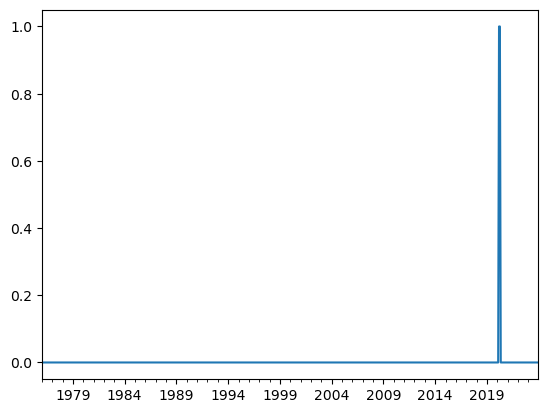

In [84]:
unemp_state.isna().sum(axis=1).plot()

In [85]:
unemp_state = unemp_state.dropna()

In [86]:
unemp_state

,CAUR,TXUR,FLUR,NYUR,OHUR,MIUR,PAUR,NCUR,ILUR,ALUR,...,AKUR,NHUR,WYUR,MTUR,IDUR,DCUR,SDUR,MEUR,RIUR,VTUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,9.9,8.0,6.4,6.6,6.6,...,7.1,6.5,4.1,5.8,5.6,8.7,3.3,8.7,7.8,8.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,9.9,8.1,6.4,6.6,6.6,...,7.1,6.5,4.1,5.8,5.6,8.7,3.3,8.7,7.8,8.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,9.9,8.1,6.4,6.6,6.6,...,7.0,6.5,4.1,5.8,5.6,8.6,3.2,8.6,7.7,8.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,9.8,8.1,6.3,6.6,6.5,...,6.9,6.5,4.0,5.8,5.6,8.5,3.1,8.6,7.7,8.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,9.6,8.1,6.1,6.6,6.4,...,6.9,6.5,3.9,5.8,5.6,8.4,3.1,8.5,7.7,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,4.6,4.1,2.7,3.9,3.4,3.7,3.5,3.3,4.1,2.1,...,3.9,1.8,2.9,2.5,3.0,5.0,1.9,2.5,2.7,1.8
2023-09-01,4.7,4.1,2.8,4.0,3.4,3.9,3.4,3.4,4.4,2.2,...,4.1,2.0,2.9,2.7,3.1,5.0,1.9,2.7,2.6,1.9
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.1,3.4,3.4,4.6,2.3,...,4.3,2.1,2.9,2.8,3.2,5.0,2.0,2.8,2.7,2.0
2023-11-01,4.9,4.1,2.9,4.3,3.6,4.3,3.4,3.5,4.7,2.4,...,4.4,2.3,3.0,3.0,3.3,5.0,2.0,3.0,2.9,2.1


In [87]:
# create a mapping dict to change column names using list comprehension
id_to_state = df_unemp['title'].str.replace('Unemployment Rate in ','').to_dict()

In [88]:
id_to_state

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': 'California',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'TXUR': 'Texas',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'FLUR': 'Florida',
 'NYUR': 'New York',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'OHUR': 'Ohio',
 'LNS14000001': 'Unemployment Rate - Men',
 'LNS14024887': 'Unemployment Rate - 16-24 Yrs.',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'MIUR': 'Michigan',
 'PAUR': 'Pennsylvania',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'NCUR': 'North Carolina',
 'ILUR'

In [92]:
unemp_state.columns

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'MIUR', 'PAUR', 'NCUR', 'ILUR',
       'ALUR', 'NJUR', 'MAUR', 'WIUR', 'COUR', 'GAUR', 'VAUR', 'SCUR', 'AZUR',
       'IAUR', 'ORUR', 'KYUR', 'INUR', 'MDUR', 'TNUR', 'ARUR', 'NVUR', 'MNUR',
       'NMUR', 'MOUR', 'LAUR', 'PRUR', 'WVUR', 'UTUR', 'CTUR', 'WAUR', 'MSUR',
       'NDUR', 'OKUR', 'DEUR', 'NEUR', 'HIUR', 'KSUR', 'AKUR', 'NHUR', 'WYUR',
       'MTUR', 'IDUR', 'DCUR', 'SDUR', 'MEUR', 'RIUR', 'VTUR'],
      dtype='object')

In [93]:
# change column names using list comprehension
unemp_state.columns = [id_to_state[d] for d in unemp_state.columns]

In [94]:
unemp_state.columns

Index(['California', 'Texas', 'Florida', 'New York', 'Ohio', 'Michigan',
       'Pennsylvania', 'North Carolina', 'Illinois', 'Alabama', 'New Jersey',
       'Massachusetts', 'Wisconsin', 'Colorado', 'Georgia', 'Virginia',
       'South Carolina', 'Arizona', 'Iowa', 'Oregon', 'Kentucky', 'Indiana',
       'Maryland', 'Tennessee', 'Arkansas', 'Nevada', 'Minnesota',
       'New Mexico', 'Missouri', 'Louisiana', 'Puerto Rico', 'West Virginia',
       'Utah', 'Connecticut', 'Washington', 'Mississippi', 'North Dakota',
       'Oklahoma', 'Delaware', 'Nebraska', 'Hawaii', 'Kansas', 'Alaska',
       'New Hampshire', 'Wyoming', 'Montana', 'Idaho',
       'the District of Columbia', 'South Dakota', 'Maine', 'Rhode Island',
       'Vermont'],
      dtype='object')

In [95]:
unemp_state.head()

,California,Texas,Florida,New York,Ohio,Michigan,Pennsylvania,North Carolina,Illinois,Alabama,...,Alaska,New Hampshire,Wyoming,Montana,Idaho,the District of Columbia,South Dakota,Maine,Rhode Island,Vermont
1976-01-01,9.2,5.8,9.7,10.3,8.1,9.9,8.0,6.4,6.6,6.6,...,7.1,6.5,4.1,5.8,5.6,8.7,3.3,8.7,7.8,8.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,9.9,8.1,6.4,6.6,6.6,...,7.1,6.5,4.1,5.8,5.6,8.7,3.3,8.7,7.8,8.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,9.9,8.1,6.4,6.6,6.6,...,7.0,6.5,4.1,5.8,5.6,8.6,3.2,8.6,7.7,8.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,9.8,8.1,6.3,6.6,6.5,...,6.9,6.5,4.0,5.8,5.6,8.5,3.1,8.6,7.7,8.6
1976-05-01,9.0,5.9,9.3,10.1,7.8,9.6,8.1,6.1,6.6,6.4,...,6.9,6.5,3.9,5.8,5.6,8.4,3.1,8.5,7.7,8.5


In [ ]:
# import plotly.express as px

# plt.style.use('fivethirtyeight') #default ploting style
# pd.set_option('display.max_columns', 500) #to see all the columns in dataframe
# color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"] #list of color for visualization

https://www.kaggle.com/code/dhruvenprajapati/economic-data-analysis-with-fred-api

In [98]:
# export unemp_state to csv
unemp_state.to_csv('../cleansed data/unemp_state.csv')